![bees](bees.jpg)

# Which plants are better for bees: native or non-native?

## 📖 Background
The local government environment agency is undertaking a project focused on developing pollinator bee-friendly spaces. These spaces aim to provide an optimized environment for pollinator bees, allowing them to thrive and contribute to a healthy ecosystem. The agency has collected data on both native and non-native plants and their impact on pollinator bees.

To effectively create these bee-friendly spaces, it is crucial to choose the right plants that will attract and support the bees. Native plants are those naturally occurring in the local ecosystem, while non-native plants are introduced from other regions or countries. Both types of plants can be utilized in this project.

The collected data on native and non-native plants will serve as the basis for analysis. By examining the effects of different plant species on pollinator bees, patterns and correlations can be identified. The analysis aims to determine which plants are most beneficial for the bees, offering them suitable food sources, shelter, and nesting opportunities.

Ultimately, the goal is to provide recommendations based on the data analysis. These recommendations will guide the selection of plants for creating optimized environments in the bee-friendly spaces, ensuring the best possible conditions for the pollinator bees to thrive and contribute to a healthier and more sustainable ecosystem.

## 💾 The Data
The data regarding the research on plants and bees can be found in the file named `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `bees_num` | The total number of bee individuals in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plot. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

## Importing Library

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Extraction and Cleaning

In [117]:
data_raw = pd.read_csv("data/plants_and_bees.csv")
data_raw

,sample_id,bees_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1246,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1247,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1248,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0


In this dataset, there are some values that are missing or not applicable. In the **nonnative_bee** columns, these missing values are represented as **"Null"** Additionally, in the **plant_species** column, there is a value of **"None"** which indicates the sample was taken from the air and not associated with a specific plant. 

To analyze the plant preferences of either native or nonnative bee species, it is important to **remove** these **missing** or **irrelevant** values from the dataset.

In [118]:
#Drop the missing values
data = data_raw[data_raw['plant_species'] != 'None'].dropna(subset=['nonnative_bee'])

## Data Grouping : Native and Non-Native Species

In Data Grouping, we focus on categorizing bee species into two distinct groups: **native bee species** and **non-native bee species**. Our objective is to acquire knowledge regarding the **plant preferences** of **native** and **non-native bee** species.

In [119]:
#Plant preferences of Native Bee Species
native_species = data[data['nonnative_bee']==0]
native_preferences = native_species['plant_species'].value_counts()

#Plant preferences of Non-Native Bee Species
non_native_species = data[data['nonnative_bee'] == 1]
non_native_preferences = non_native_species['plant_species'].value_counts()

## Visualization of Plant Preferences of Native vs Non-Native Bee Species

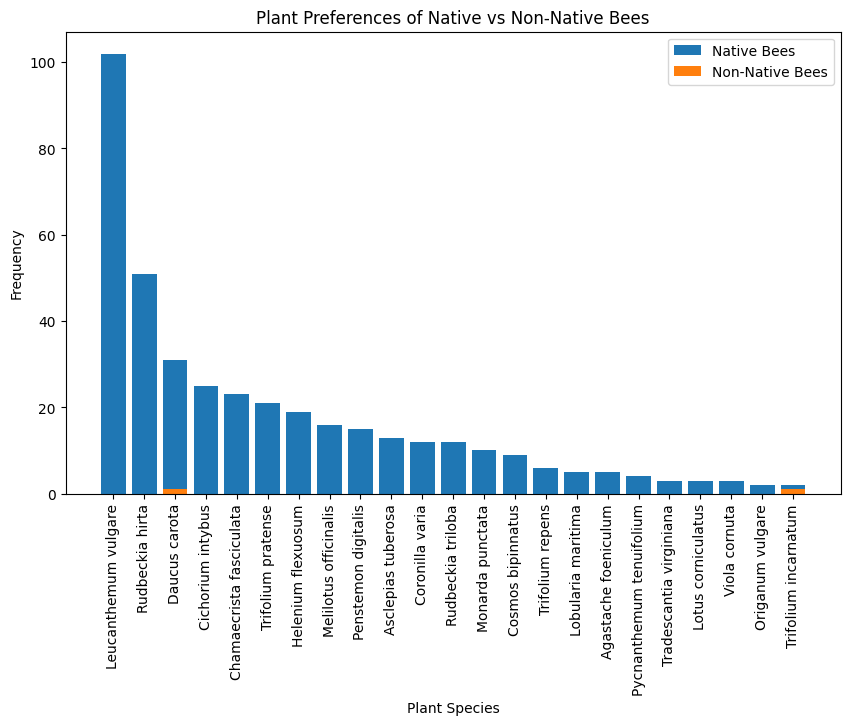

In [120]:
plt.figure(figsize=(10, 6))
plt.bar(native_preferences.index, native_preferences.values, label='Native Bees')
plt.bar(non_native_preferences.index, non_native_preferences.values, label='Non-Native Bees')
plt.xlabel('Plant Species')
plt.ylabel('Frequency')
plt.title('Plant Preferences of Native vs Non-Native Bees')
plt.legend()
plt.xticks(rotation=90)
plt.show()

## A Visualization of the Distribution of Bee and Plant Species Across One of the Samples

In [121]:
unique_id = data['sample_id'].unique()
print("Total ID Number = ",len(unique_id),'\n')
print("Sample ID = ", *unique_id)

Total ID Number =  36 

Sample ID =  17406 17409 17412 17415 17418 17420 17422 17425 17427 17429 17431 17433 17435 17437 17439 17441 17443 17445 17447 17450 17452 17454 17456 17458 17459 17461 17463 17465 17466 17469 17471 17473 17475 17477 17479 17481


In the filtered collected data, there are a total of 36 ID Numbers. One of our objectives is to examine the distribution of bee and plant species within a specific sample identified in the "sample_id" column. To visualize this distribution, we can generate a plot that displays the distribution of each sample ID. By manipulating the **input** of the **sample_id**, the plot will dynamically update to reflect the distribution of different samples

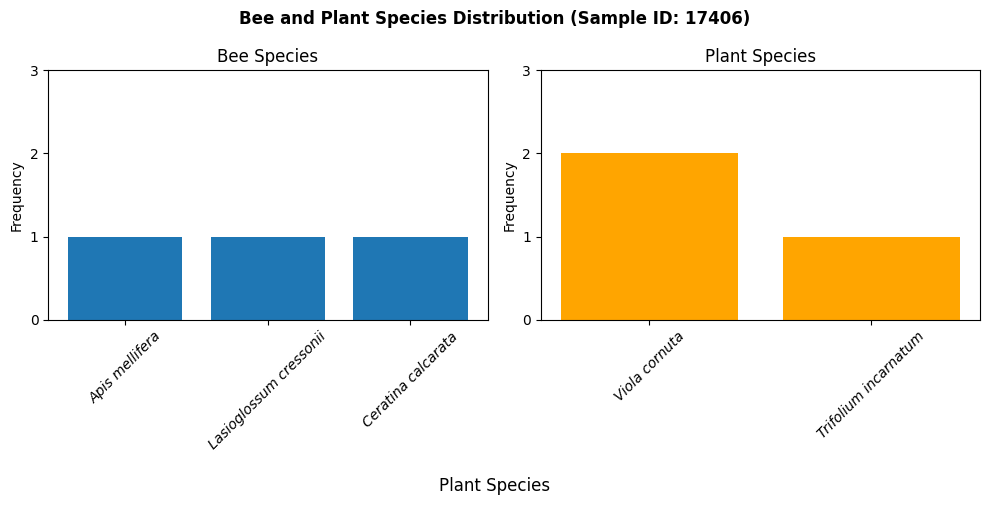

In [122]:
sample_id = 17406

# Filter data for the selected sample ID
sample_data = data[data['sample_id'] == sample_id]

# Count the occurrences of bee and plant species in the sample
bee_counts = sample_data['bee_species'].value_counts()
plant_counts = sample_data['plant_species'].value_counts()

#Plotting the Bee and Plant Species Distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Bee and Plant Species Distribution (Sample ID: {})'.format(sample_id),fontweight='bold')
fig.supxlabel('Plant Species')
ytick_param = max(max(bee_counts.values),max(plant_counts.values))+2

axes[0].bar(bee_counts.index, bee_counts.values)
axes[0].set_title('Bee Species')
axes[0].set_ylabel('Frequency')
axes[0].set_yticks(np.arange(0,ytick_param,step=1))
axes[0].set_xticklabels(bee_counts.index,rotation=45,fontstyle='italic')


axes[1].bar(plant_counts.index, plant_counts.values, color='orange')
axes[1].set_title('Plant Species')
axes[1].set_yticks(np.arange(0,ytick_param,step=1))
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(plant_counts.index,rotation=45,fontstyle='italic')

plt.tight_layout()
plt.show()

## The top three recommended plant species to support native bees are:
**1. Leucanthemum vulgare**  
**2. Rudbeckia hirta**  
**3. Daucus carota**

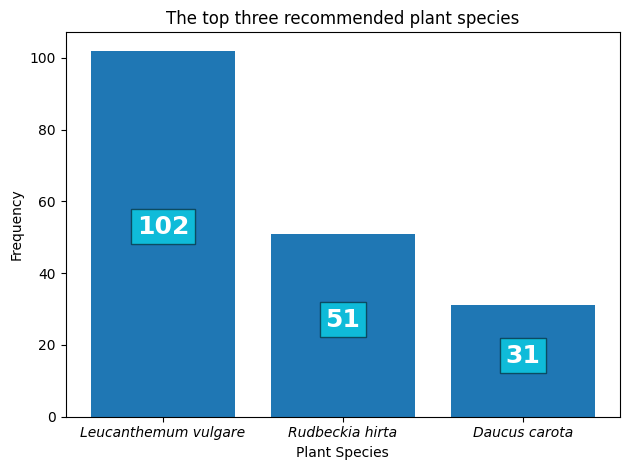

In [123]:
plt.bar(native_preferences.index[:3], native_preferences.values[:3], label='Native Bees')

for i in range(3):
    plt.text(i,native_preferences.values[i]//2,native_preferences[i],ha='center',bbox = dict(facecolor = 'cyan', alpha =.5),fontsize=18,fontweight='bold', color='white')

plt.ylabel('Frequency')
plt.xlabel('Plant Species')
plt.xticks(native_preferences.index[:3],fontstyle='italic')
plt.title('The top three recommended plant species')
plt.tight_layout()
plt.show()

Based on the collected data, it has been determined that three plant species exhibit notable attractiveness to native bees. **Leucanthemum vulgare** stands out as the most alluring, successfully attracting a total of **102** native bees. **Rudbeckia hirta** closely follows with **51** native bees being drawn to it. Additionally, **Daucus carota** has demonstrated appeal to **31** native bees. 

Therefore, based on these findings, I strongly recommend incorporating these plant species into the creation of optimized environments that cater to the needs of bees. By providing suitable food sources, shelter, and nesting opportunities, these environments will ensure the most favorable conditions for enhancing native bee populations and contributing to a healthier, more sustainable ecosystem.